In [1]:
# This is to rain and test the Official YOLOv7 on Mask Wearing dataset.
# Note: the notebook was run using the "Python 3 (ipykernel)" in AML.

# He Zhang, Sep. 2022

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

Torch: 1.8.1+cu102
Torchvision: 0.9.1+cu102
GPU: 2 Tesla M60


In [2]:
# go to folder YOLOv7
%cd yolov7/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov7


In [3]:
%%writefile ./data/mask149yolov7.yaml

# train & val & test sets
train: ../datasets/mask_wearing_dataset/images/train
val: ../datasets/mask_wearing_dataset/images/valid
test: ../datasets/mask_wearing_dataset/images/valid # test images (optional)

# number of classes
nc: 2

# class names
names: ["mask", "no-mask"]

Overwriting ./data/mask149yolov7.yaml


In [5]:
# train
%run -i train.py --img 672 672 --batch-size 20 --epochs 300 --data data/mask149yolov7.yaml --name exp_mask --cfg cfg/training/yolov7.yaml --weights yolov7.pt --hyp data/hyp.scratch.custom.yaml --workers 8 --device 0

YOLOR 🚀 v0.1-107-g44d8ab4 torch 1.8.1+cu102 CUDA:0 (Tesla M60, 8129.25MB)

Namespace(adam=False, artifact_alias='latest', batch_size=20, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/mask149yolov7.yaml', device='0', entity=None, epochs=300, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[672, 672], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp_mask', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp_mask', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=20, upload_dataset=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_

wandb: Install Weights & Biases for YOLOR logging with 'pip install wandb' (recommended)


Overriding model.yaml nc=80 with nc=2

                 from  n    params  module                                  arguments                     
  0                -1  1       928  models.common.Conv                      [3, 32, 3, 1]                 
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  5                -2  1      8320  models.common.Conv                      [128, 64, 1, 1]               
  6                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
  7                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]               

 76                -1  1         0  models.common.MP                        []                            
 77                -1  1     16640  models.common.Conv                      [128, 128, 1, 1]              
 78                -3  1     16640  models.common.Conv                      [128, 128, 1, 1]              
 79                -1  1    147712  models.common.Conv                      [128, 128, 3, 2]              
 80      [-1, -3, 63]  1         0  models.common.Concat                    [1]                           
 81                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 82                -2  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 83                -1  1    295168  models.common.Conv                      [256, 128, 3, 1]              
 84                -1  1    147712  models.common.Conv                      [128, 128, 3, 1]              
 85                -1  1    147712  m


autoanchor: Analyzing anchors... anchors/target = 5.94, Best Possible Recall (BPR) = 0.9986



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     0/299     5.42G    0.0664     2.868   0.01557      2.95        83       672: 100%|██████████| 6/6 [00:49<00:00,  8.25s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:11<00:00, 11.31s/it]


                 all          29         162     0.00185        0.05    0.000462    9.08e-05



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     1/299     7.14G    0.0663     2.246   0.01556     2.328        46       672: 100%|██████████| 6/6 [00:10<00:00,  1.69s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


                 all          29         162     0.00299       0.153    0.000759     0.00013



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     2/299     7.71G   0.06761     1.224   0.01559     1.307       159       672: 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.58s/it]


                 all          29         162     0.00375       0.128    0.000603    9.59e-05



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     3/299     7.71G   0.06667    0.6452   0.01555    0.7274        42       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]


                 all          29         162     0.00609      0.0711    0.000695    8.69e-05



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     4/299     7.71G   0.06668     0.435   0.01556    0.5172        81       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]


                 all          29         162     0.00642      0.0461    0.000886    0.000111



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     5/299     7.72G   0.06973    0.3064   0.01559    0.3917       164       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]


                 all          29         162      0.0176      0.0436     0.00193    0.000241



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     6/299     7.72G   0.06874    0.2193   0.01558    0.3036        92       672: 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.78s/it]


                 all          29         162      0.0195      0.0496     0.00221    0.000303



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     7/299     7.72G   0.06948    0.1618   0.01559    0.2469        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.73s/it]


                 all          29         162      0.0177      0.0496     0.00252     0.00037



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     8/299     7.72G   0.06929    0.1232   0.01557    0.2081        64       672: 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:03<00:00,  3.36s/it]


                 all          29         162      0.0151       0.103     0.00276    0.000398



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     9/299     7.72G   0.07069   0.08984    0.0156    0.1761        57       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:02<00:00,  2.43s/it]


                 all          29         162      0.0127        0.11     0.00241    0.000374



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    10/299     7.72G   0.06986   0.06947   0.01555    0.1549        39       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


                 all          29         162      0.0122       0.138     0.00292    0.000419



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    11/299     7.72G   0.06949   0.05425   0.01557    0.1393        96       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.69s/it]


                 all          29         162      0.0128       0.131     0.00329    0.000488



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    12/299     7.72G   0.06899   0.04316   0.01559    0.1277        31       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


                 all          29         162      0.0121       0.145     0.00367    0.000526



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    13/299     7.72G   0.07015   0.03908   0.01558    0.1248        37       672: 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


                 all          29         162      0.0138       0.156     0.00481     0.00069



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    14/299     7.72G   0.06881   0.03586   0.01558    0.1202        40       672: 100%|██████████| 6/6 [00:09<00:00,  1.60s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


                 all          29         162      0.0134       0.142     0.00618    0.000949



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    15/299     7.72G   0.06909   0.03336   0.01558     0.118        86       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


                 all          29         162      0.0155       0.276     0.00891     0.00136



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    16/299     7.72G   0.06717   0.02641   0.01557    0.1091        26       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


                 all          29         162       0.023       0.216      0.0135     0.00203



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    17/299     7.72G   0.06732   0.02868   0.01557    0.1116        63       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


                 all          29         162      0.0316       0.393      0.0206     0.00313



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    18/299     7.72G    0.0674    0.0249   0.01558    0.1079        40       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


                 all          29         162      0.0422       0.404      0.0309     0.00481



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    19/299     7.72G   0.06714   0.02365   0.01558    0.1064        62       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]


                 all          29         162      0.0608        0.45      0.0558     0.00913



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    20/299     7.72G     0.065   0.02068   0.01559    0.1013        45       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


                 all          29         162       0.251       0.206       0.117       0.024



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    21/299     7.72G   0.06405   0.01969    0.0156   0.09933        28       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


                 all          29         162       0.236       0.313       0.133      0.0314



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    22/299     7.72G   0.06383   0.02055   0.01559   0.09997        35       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


                 all          29         162       0.157       0.341       0.121      0.0299



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    23/299     7.72G   0.06428    0.0203   0.01558    0.1002        44       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


                 all          29         162       0.284       0.252       0.138      0.0336



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    24/299     7.72G   0.06429   0.02212   0.01558     0.102        45       672: 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


                 all          29         162       0.333       0.245       0.148      0.0427



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    25/299     7.72G   0.06256   0.02081   0.01556   0.09893        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]


                 all          29         162       0.379       0.263       0.169      0.0491



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    26/299     7.72G   0.06108   0.01916   0.01555   0.09579        53       672: 100%|██████████| 6/6 [00:09<00:00,  1.61s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


                 all          29         162       0.387       0.284       0.188      0.0623



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    27/299     7.72G   0.05819   0.01929   0.01553   0.09301        70       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


                 all          29         162       0.388       0.294       0.207      0.0778



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    28/299     7.72G   0.05861   0.02083    0.0155   0.09494        56       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


                 all          29         162       0.403       0.291       0.225      0.0923



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    29/299     7.72G   0.05527   0.01759    0.0155   0.08836        79       672: 100%|██████████| 6/6 [00:09<00:00,  1.63s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


                 all          29         162       0.285        0.51       0.255       0.107



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    30/299     7.72G   0.05359   0.01621   0.01545   0.08525        42       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


                 all          29         162       0.363        0.45       0.291       0.123



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    31/299     7.72G   0.05277   0.01726   0.01545   0.08548        54       672: 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


                 all          29         162       0.307       0.617       0.309       0.136



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    32/299     7.72G   0.05224   0.01842   0.01544   0.08609        61       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


                 all          29         162       0.377       0.571       0.342       0.158



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    33/299     7.72G   0.04816    0.0159   0.01539   0.07945        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.373       0.667       0.372       0.177



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    34/299     7.72G   0.04944    0.0181    0.0153   0.08283        26       672: 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.391       0.632       0.366       0.177



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    35/299     7.72G   0.04769   0.01694   0.01535   0.07998        48       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.397       0.755       0.402       0.197



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    36/299     7.72G   0.04714   0.01524   0.01526   0.07764        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162        0.41       0.808       0.422       0.222



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    37/299     7.72G   0.04629   0.01555   0.01521   0.07705        55       672: 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.408       0.802        0.41       0.215



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    38/299     7.72G   0.04749   0.01493   0.01517   0.07759        41       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


                 all          29         162       0.414       0.813       0.429       0.231



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    39/299     7.72G   0.04495    0.0154    0.0152   0.07555        81       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.408       0.891       0.443       0.243



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    40/299     7.72G   0.04515   0.01452   0.01507   0.07473        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.408       0.892       0.455       0.249



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    41/299     7.72G    0.0456   0.01409   0.01499   0.07468        35       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.409       0.887       0.466       0.255



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    42/299     7.72G   0.04348    0.0134   0.01497   0.07185        43       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.425       0.823       0.465       0.259



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    43/299     7.72G   0.04445    0.0134    0.0149   0.07275        40       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.425       0.855       0.474       0.258



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    44/299     7.72G   0.04321   0.01314   0.01474    0.0711        27       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.426        0.88       0.471       0.253



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    45/299     7.72G   0.04222   0.01499   0.01466   0.07187        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.425       0.887       0.472       0.268



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    46/299     7.72G   0.04199   0.01319   0.01457   0.06975        63       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162        0.43       0.883       0.476       0.265



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    47/299     7.72G    0.0416   0.01162   0.01432   0.06754        49       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.431       0.883       0.474       0.267



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    48/299     7.72G   0.04026   0.01264   0.01425   0.06716        41       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.425        0.89       0.482       0.276



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    49/299     7.72G    0.0397   0.01415   0.01421   0.06807        64       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.434       0.898       0.478       0.271



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    50/299     7.72G   0.04203    0.0141   0.01394   0.07007        43       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.452       0.748       0.481       0.248



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    51/299     7.72G   0.04078   0.01436   0.01358   0.06873        44       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]


                 all          29         162       0.462       0.741       0.491       0.267



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    52/299     7.72G   0.03933   0.01325   0.01342     0.066        39       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.442       0.876       0.477       0.263



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    53/299     7.72G   0.04165   0.01317   0.01313   0.06795        62       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.437       0.876        0.47       0.263



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    54/299     7.72G   0.04076   0.01297   0.01288   0.06661        44       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162        0.44       0.844       0.471       0.257



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    55/299     7.72G   0.04118   0.01584    0.0127   0.06971       172       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.453       0.715        0.48       0.245



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    56/299     7.72G   0.03878   0.01405   0.01208   0.06492        53       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.451        0.74       0.495       0.286



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    57/299     7.72G   0.03778    0.0114   0.01244   0.06162        23       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.445       0.869       0.472       0.269



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    58/299     7.72G   0.03847   0.01367   0.01158   0.06371        63       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162       0.418       0.855       0.473       0.247



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    59/299     7.72G   0.03784   0.01445   0.01109   0.06338        58       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.434       0.883       0.486       0.271



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    60/299     7.72G   0.03639   0.01429   0.01088   0.06155        90       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.408       0.699       0.476       0.246



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    61/299     7.72G   0.03532   0.01268   0.01068   0.05868        40       672: 100%|██████████| 6/6 [00:13<00:00,  2.24s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.426       0.897        0.48       0.287



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    62/299     7.72G   0.03512   0.01441  0.009898   0.05944        53       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.415       0.926       0.475       0.265



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    63/299     7.72G   0.03549   0.01376   0.01039   0.05965        67       672: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.423       0.919       0.472       0.283



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    64/299     7.72G   0.03457   0.01466  0.009627   0.05886        60       672: 100%|██████████| 6/6 [00:12<00:00,  2.06s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.417       0.894       0.481       0.266



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    65/299     7.72G   0.03591   0.01848  0.009399    0.0638       152       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.425       0.894       0.476        0.27



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    66/299     7.72G   0.03411   0.01296  0.009318   0.05639        50       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162       0.436       0.926       0.494       0.274



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    67/299     7.72G   0.03225   0.01422   0.01011   0.05658        54       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.393       0.919       0.463        0.24



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    68/299     7.72G   0.03574   0.01583  0.009293   0.06086        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.436       0.801       0.491       0.278



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    69/299     7.72G   0.03267   0.01366  0.009958   0.05629        50       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.432       0.815       0.481       0.271



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    70/299     7.72G   0.03306   0.01335  0.008783    0.0552        50       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.435       0.915        0.49       0.271



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    71/299     7.72G   0.03128   0.01437  0.009295   0.05495        67       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.392        0.79        0.51       0.313



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    72/299     7.72G     0.031   0.01504  0.009262    0.0553        38       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.435       0.908       0.506       0.311



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    73/299     7.72G   0.02997   0.01338  0.008786   0.05214        35       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.486       0.598       0.516       0.281



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    74/299     7.72G   0.03094   0.01487  0.008913   0.05473        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.382        0.94       0.505       0.282



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    75/299     7.72G   0.03182   0.01437  0.008348   0.05454        76       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.448        0.68         0.5        0.28



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    76/299     7.72G   0.03067    0.0137  0.008862   0.05324        78       672: 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.439       0.922        0.51       0.308



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    77/299     7.72G   0.02984   0.01367  0.008389    0.0519        38       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.464       0.927       0.529       0.318



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    78/299     7.72G   0.02864   0.01485  0.007951   0.05144        33       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.405       0.907       0.515       0.324



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    79/299     7.72G   0.02795   0.01317  0.008115   0.04924        35       672: 100%|██████████| 6/6 [00:10<00:00,  1.73s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.427       0.933       0.515       0.299



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    80/299     7.72G   0.02938   0.01551  0.008096   0.05299        60       672: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.424       0.911       0.528        0.33



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    81/299     7.72G   0.02803   0.01479  0.008062   0.05088        33       672: 100%|██████████| 6/6 [00:17<00:00,  2.95s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.443       0.919       0.509        0.32



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    82/299     7.72G   0.03085   0.01567  0.007319   0.05384        59       672: 100%|██████████| 6/6 [00:12<00:00,  2.15s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.384       0.919         0.5       0.267



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    83/299     7.72G   0.03057   0.01477  0.007896   0.05324        46       672: 100%|██████████| 6/6 [00:10<00:00,  1.74s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.437       0.894       0.519        0.31



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    84/299     7.72G   0.02795   0.01444  0.009144   0.05154        44       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.462       0.904       0.525        0.31



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    85/299     7.72G   0.02994   0.01508  0.007469   0.05248        41       672: 100%|██████████| 6/6 [00:11<00:00,  1.93s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.445       0.905       0.521       0.312



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    86/299     7.72G   0.02758   0.01381  0.008211    0.0496        44       672: 100%|██████████| 6/6 [00:14<00:00,  2.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


                 all          29         162       0.471       0.684       0.538       0.341



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    87/299     7.72G   0.02871   0.01518    0.0077   0.05159        94       672: 100%|██████████| 6/6 [00:11<00:00,  1.95s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.516       0.605       0.546       0.345



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    88/299     7.72G   0.02912    0.0153  0.007125   0.05155        41       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.536       0.656       0.549       0.352



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    89/299     7.72G    0.0268    0.0132  0.007873   0.04788        55       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.504       0.635       0.544       0.347



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    90/299     7.72G   0.02634   0.01438  0.007111   0.04783        28       672: 100%|██████████| 6/6 [00:12<00:00,  2.13s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.458       0.851       0.557       0.353



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    91/299     7.72G   0.02771   0.01385  0.006757   0.04832        69       672: 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.512        0.63       0.545       0.335



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    92/299     7.72G   0.02595   0.01324  0.007585   0.04677        41       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162        0.52       0.669        0.56        0.35



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    93/299     7.72G   0.03065   0.01334  0.007134   0.05112        36       672: 100%|██████████| 6/6 [00:10<00:00,  1.80s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162         0.5       0.698       0.565       0.356



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    94/299     7.72G   0.02883   0.01341  0.008607   0.05084        33       672: 100%|██████████| 6/6 [00:10<00:00,  1.77s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.516        0.66       0.567       0.353



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    95/299     7.72G   0.02593   0.01261  0.006897   0.04544        23       672: 100%|██████████| 6/6 [00:14<00:00,  2.46s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.518       0.691       0.577       0.363



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    96/299     7.72G   0.02624   0.01294  0.006894   0.04607        24       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.494       0.858       0.559       0.363



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    97/299     7.72G   0.02612   0.01346  0.006857   0.04643        34       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.483       0.787       0.548        0.35



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    98/299     7.72G   0.02782   0.01315  0.007043   0.04801        38       672: 100%|██████████| 6/6 [00:09<00:00,  1.64s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.485       0.823       0.567       0.352



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
    99/299     7.72G   0.02617   0.01472  0.007111     0.048        76       672: 100%|██████████| 6/6 [00:19<00:00,  3.22s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.469        0.84       0.596       0.375



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   100/299     7.72G   0.02381   0.01296  0.006476   0.04324        64       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162        0.51       0.701       0.591       0.351



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   101/299     7.72G   0.02723   0.01452  0.006672   0.04842        44       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.449        0.84       0.576       0.367



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   102/299     7.72G   0.02436   0.01279  0.006307   0.04345        30       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162       0.508       0.805       0.608       0.389



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   103/299     7.72G   0.02763   0.01334  0.006646   0.04762        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.606       0.586       0.605       0.332



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   104/299     7.72G   0.03164   0.01455  0.006657   0.05285        55       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.596       0.644       0.633       0.409



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   105/299     7.72G   0.02611   0.01472  0.007243   0.04807        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.483       0.815       0.603       0.358



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   106/299     7.72G   0.02527   0.01338  0.006695   0.04534        38       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]


                 all          29         162       0.728       0.606       0.681       0.401



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   107/299     7.72G    0.0245   0.01404  0.006082   0.04462        38       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.667       0.637       0.677       0.411



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   108/299     7.72G   0.02817   0.01502  0.005434   0.04863        37       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162        0.72       0.605        0.65       0.419



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   109/299     7.72G   0.02523   0.01307  0.005878   0.04418        28       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162        0.62       0.608       0.651       0.382



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   110/299     7.72G   0.02529   0.01224  0.005426   0.04296        39       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.497       0.808       0.609       0.376



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   111/299     7.72G   0.02501   0.01281  0.005414   0.04324        63       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.499       0.858       0.613       0.381



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   112/299     7.72G   0.02421   0.01235   0.00522   0.04178        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.525       0.919       0.658       0.422



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   113/299     7.72G    0.0216   0.01256  0.005973   0.04013        51       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.536       0.918       0.663       0.431



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   114/299     7.72G   0.02472   0.01208  0.005116   0.04191        34       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.527       0.846       0.673       0.401



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   115/299     7.72G   0.02962   0.01623  0.004844    0.0507        71       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.573       0.687       0.657       0.363



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   116/299     7.72G   0.03294   0.01568  0.005109   0.05373        58       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.634       0.767       0.693       0.418



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   117/299     7.72G   0.03084   0.01426  0.005153   0.05025        44       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.668       0.744       0.693       0.432



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   118/299     7.72G   0.02661   0.01537  0.005613   0.04759        95       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.719       0.716       0.727       0.433



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   119/299     7.72G   0.02742   0.01319   0.00533   0.04593        33       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.685       0.737       0.714       0.425



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   120/299     7.72G    0.0294   0.01314  0.004724   0.04727        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.652       0.712       0.705       0.418



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   121/299     7.72G   0.03063   0.01405  0.005307   0.04999        74       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.576       0.732       0.694       0.381



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   122/299     7.72G   0.03037   0.01388  0.005296   0.04955        39       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.641        0.72       0.688       0.417



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   123/299     7.72G   0.02874   0.01221  0.004994   0.04594        37       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.691       0.604       0.676       0.419



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   124/299     7.72G   0.02897   0.01534  0.005317   0.04963        61       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


                 all          29         162       0.599        0.74       0.693       0.379



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   125/299     7.72G   0.02721   0.01289  0.005078   0.04518        37       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.602       0.748       0.702       0.446



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   126/299     7.72G   0.02781   0.01305  0.005419   0.04629        34       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.627       0.715       0.693       0.422



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   127/299     7.72G   0.02545   0.01325  0.004777   0.04348        43       672: 100%|██████████| 6/6 [00:12<00:00,  2.01s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.598       0.857       0.699       0.415



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   128/299     7.72G   0.02687   0.01749  0.004868   0.04923       194       672: 100%|██████████| 6/6 [00:15<00:00,  2.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.581       0.837       0.729        0.45



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   129/299     7.72G   0.02825    0.0141  0.004834   0.04719        61       672: 100%|██████████| 6/6 [00:13<00:00,  2.25s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.653       0.819       0.727       0.402



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   130/299     7.72G   0.02879   0.01382  0.004285   0.04689        50       672: 100%|██████████| 6/6 [00:10<00:00,  1.82s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.615       0.787       0.697       0.433



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   131/299     7.72G   0.02558   0.01294   0.00453   0.04305        35       672: 100%|██████████| 6/6 [00:16<00:00,  2.80s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.804       0.544       0.635        0.38



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   132/299     7.72G   0.02509   0.01204  0.004002   0.04113        42       672: 100%|██████████| 6/6 [00:14<00:00,  2.43s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.563       0.739       0.652       0.406



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   133/299     7.72G     0.026   0.01332  0.004104   0.04342        37       672: 100%|██████████| 6/6 [00:12<00:00,  2.02s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.655       0.728       0.721       0.385



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   134/299     7.72G    0.0282   0.01417   0.00485   0.04721        36       672: 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


                 all          29         162       0.795       0.692       0.747       0.461



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   135/299     7.72G   0.02526   0.01237  0.003997   0.04163        24       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.698       0.722       0.719       0.446



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   136/299     7.72G   0.02286   0.01162  0.004681   0.03916        16       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162       0.669       0.788       0.731       0.431



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   137/299     7.72G   0.02567     0.014  0.003626   0.04329        40       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


                 all          29         162       0.699       0.807       0.751       0.454



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   138/299     7.72G   0.02784   0.01247   0.00368   0.04399        34       672: 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.731       0.799       0.754       0.459



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   139/299     7.72G   0.03223   0.01666   0.00409   0.05298       164       672: 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162        0.81       0.694       0.776       0.493



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   140/299     7.72G   0.02801   0.01133   0.00357   0.04291        50       672: 100%|██████████| 6/6 [00:10<00:00,  1.82s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.787       0.783       0.787       0.485



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   141/299     7.72G   0.02738   0.01359  0.003213   0.04417        59       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162        0.83       0.683       0.793       0.507



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   142/299     7.72G   0.02695    0.0117  0.003593   0.04223        37       672: 100%|██████████| 6/6 [00:10<00:00,  1.68s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.821       0.773       0.823       0.456



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   143/299     7.72G   0.02813   0.01198  0.003602   0.04371        57       672: 100%|██████████| 6/6 [00:11<00:00,  1.89s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.879       0.744       0.827       0.496



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   144/299     7.72G   0.02715   0.01198  0.003503   0.04264        35       672: 100%|██████████| 6/6 [00:11<00:00,  1.95s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.803       0.798       0.827       0.465



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   145/299     7.72G   0.02725   0.01177  0.003117   0.04213        53       672: 100%|██████████| 6/6 [00:22<00:00,  3.71s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162        0.68        0.86       0.797       0.495



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   146/299     7.72G   0.02752   0.01262   0.00306    0.0432        64       672: 100%|██████████| 6/6 [00:18<00:00,  3.11s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.805       0.754       0.825       0.455



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   147/299     7.72G   0.02711   0.01268   0.00274   0.04253        36       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.799       0.762       0.817       0.519



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   148/299     7.72G   0.02888   0.01254   0.00303   0.04445        40       672: 100%|██████████| 6/6 [00:15<00:00,  2.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


                 all          29         162       0.787       0.748       0.822       0.441



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   149/299     7.72G   0.02786   0.01111  0.002729   0.04169        44       672: 100%|██████████| 6/6 [00:24<00:00,  4.07s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.857       0.766       0.837       0.511



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   150/299     7.72G   0.02616   0.01274  0.002658   0.04156        74       672: 100%|██████████| 6/6 [00:21<00:00,  3.61s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.891       0.785       0.845       0.489



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   151/299     7.72G   0.02339   0.01386  0.002626   0.03988        68       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.804       0.769       0.821       0.482



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   152/299     7.72G   0.02322   0.01207  0.002292   0.03759        62       672: 100%|██████████| 6/6 [00:25<00:00,  4.27s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.863       0.766       0.842       0.521



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   153/299     7.72G   0.02653   0.01237   0.00244   0.04134        34       672: 100%|██████████| 6/6 [00:20<00:00,  3.38s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.809       0.827       0.857       0.543



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   154/299     7.72G   0.02636   0.01139    0.0024   0.04015        31       672: 100%|██████████| 6/6 [00:21<00:00,  3.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


                 all          29         162       0.858       0.798       0.859       0.546



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   155/299     7.72G    0.0265   0.01279  0.002188   0.04147        48       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.833       0.824       0.841       0.525



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   156/299     7.72G   0.02518   0.01263   0.00221   0.04002        65       672: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.888       0.812       0.867       0.477



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   157/299     7.72G   0.02797   0.01337  0.002295   0.04364        78       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.821       0.821       0.851       0.569



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   158/299     7.72G    0.0242   0.01141   0.00199   0.03761        38       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.751       0.871       0.848       0.486



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   159/299     7.72G   0.02482   0.01304  0.001887   0.03975        41       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.922       0.716       0.837       0.547



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   160/299     7.72G   0.02314   0.01149  0.001787   0.03642        67       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.796       0.808       0.816       0.523



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   161/299     7.72G   0.02245   0.01435   0.00215   0.03895       161       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.825        0.78       0.823       0.524



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   162/299     7.72G   0.02367   0.01223   0.00172   0.03762        66       672: 100%|██████████| 6/6 [00:20<00:00,  3.34s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.841       0.798       0.836       0.505



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   163/299     7.72G   0.02526   0.01173  0.001485   0.03847        52       672: 100%|██████████| 6/6 [00:16<00:00,  2.67s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.813       0.823       0.836       0.543



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   164/299     7.72G   0.02566   0.01361  0.001484   0.04075        59       672: 100%|██████████| 6/6 [00:17<00:00,  2.98s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.835       0.816       0.834       0.491



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   165/299     7.72G   0.02532   0.01185  0.001493   0.03866        40       672: 100%|██████████| 6/6 [00:23<00:00,  3.85s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.811       0.824       0.836       0.531



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   166/299     7.72G   0.02277   0.01086  0.001345   0.03497        47       672: 100%|██████████| 6/6 [00:17<00:00,  2.90s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


                 all          29         162       0.814       0.851       0.836       0.509



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   167/299     7.72G   0.02271   0.01168  0.001644   0.03604        63       672: 100%|██████████| 6/6 [00:20<00:00,  3.36s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.773        0.84        0.83       0.555



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   168/299     7.72G   0.02294   0.01061  0.001529   0.03508        22       672: 100%|██████████| 6/6 [00:15<00:00,  2.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.874       0.773       0.821       0.499



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   169/299     7.72G   0.02361   0.01092  0.001415   0.03595        37       672: 100%|██████████| 6/6 [00:22<00:00,  3.69s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.804       0.806        0.82       0.541



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   170/299     7.72G   0.02353   0.01169  0.001363   0.03658        59       672: 100%|██████████| 6/6 [00:18<00:00,  3.13s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162        0.78       0.847       0.836       0.502



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   171/299     7.72G   0.02104    0.0113  0.001031   0.03337        45       672: 100%|██████████| 6/6 [00:22<00:00,  3.73s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.786        0.84       0.822       0.534



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   172/299     7.72G   0.02033   0.01143  0.001633   0.03339        77       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.785       0.865       0.829       0.513



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   173/299     7.72G   0.02069   0.01053  0.001368   0.03258        33       672: 100%|██████████| 6/6 [00:21<00:00,  3.65s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.817       0.819       0.828       0.513



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   174/299     7.72G   0.02207   0.01077  0.001138   0.03398        46       672: 100%|██████████| 6/6 [00:22<00:00,  3.72s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162        0.89       0.815       0.838       0.534



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   175/299     7.72G   0.02134   0.01123 0.0009759   0.03355        49       672: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.797        0.84       0.804       0.487



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   176/299     7.72G   0.01979   0.01038  0.001053   0.03122        70       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.801        0.84       0.804         0.5



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   177/299     7.72G   0.02012   0.01111  0.001351   0.03258        56       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.796       0.847       0.814       0.524



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   178/299     7.72G   0.01995    0.0103   0.00101   0.03126        42       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.795       0.851       0.824       0.491



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   179/299     7.72G   0.01878   0.01226  0.001118   0.03216        48       672: 100%|██████████| 6/6 [00:09<00:00,  1.58s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.826       0.798       0.823       0.524



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   180/299     7.72G   0.01805    0.0106  0.001321   0.02997        71       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.824       0.801       0.824        0.48



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   181/299     7.72G   0.02023   0.01109 0.0007872   0.03211        65       672: 100%|██████████| 6/6 [00:20<00:00,  3.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162         0.8       0.819       0.816       0.517



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   182/299     7.72G   0.02092   0.01158  0.001218   0.03372        54       672: 100%|██████████| 6/6 [00:18<00:00,  3.13s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.817       0.823       0.825       0.505



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   183/299     7.72G   0.02059   0.01092 0.0008311   0.03234        39       672: 100%|██████████| 6/6 [00:22<00:00,  3.79s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162        0.75       0.783       0.794        0.52



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   184/299     7.72G   0.02165   0.01233  0.001222    0.0352        49       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.885       0.706       0.804       0.493



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   185/299     7.72G   0.02218   0.01236 0.0009484   0.03548       100       672: 100%|██████████| 6/6 [00:17<00:00,  2.96s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162        0.74       0.786       0.768       0.505



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   186/299     7.72G   0.02142  0.009457  0.000892   0.03177        30       672: 100%|██████████| 6/6 [00:25<00:00,  4.18s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.733        0.78        0.79       0.516



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   187/299     7.72G   0.01954   0.01041 0.0008892   0.03083        73       672: 100%|██████████| 6/6 [00:23<00:00,  3.90s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.809       0.708       0.811       0.519



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   188/299     7.72G   0.01797   0.01096  0.001058   0.02999        86       672: 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.754       0.803       0.825        0.54



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   189/299     7.72G   0.01687   0.01015 0.0009106   0.02793        54       672: 100%|██████████| 6/6 [00:13<00:00,  2.29s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.819       0.787       0.829       0.556



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   190/299     7.72G   0.01593  0.009382 0.0009117   0.02622        54       672: 100%|██████████| 6/6 [00:25<00:00,  4.27s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.887       0.767       0.842       0.557



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   191/299     7.72G   0.01701  0.009339 0.0007749   0.02713        33       672: 100%|██████████| 6/6 [00:23<00:00,  3.86s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.882       0.742       0.827        0.55



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   192/299     7.72G   0.02083   0.01161 0.0009026   0.03334        42       672: 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.882       0.764       0.844       0.541



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   193/299     7.72G   0.02005   0.01005  0.001107    0.0312        38       672: 100%|██████████| 6/6 [00:21<00:00,  3.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162        0.89       0.776       0.852       0.555



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   194/299     7.72G   0.01759   0.01064 0.0009001   0.02913        42       672: 100%|██████████| 6/6 [00:15<00:00,  2.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.887       0.773       0.852       0.567



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   195/299     7.72G    0.0169   0.01022 0.0007742    0.0279        66       672: 100%|██████████| 6/6 [00:13<00:00,  2.33s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.887       0.766       0.856       0.568



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   196/299     7.72G   0.01694  0.009751 0.0007387   0.02743        36       672: 100%|██████████| 6/6 [00:10<00:00,  1.72s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.912       0.762        0.87       0.586



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   197/299     7.72G   0.01685   0.01223 0.0008752   0.02996        45       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.897       0.769       0.874       0.577



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   198/299     7.72G   0.01748   0.01552  0.000898    0.0339       225       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]


                 all          29         162       0.947       0.755       0.883       0.586



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   199/299     7.72G   0.01816   0.01016 0.0008677   0.02918        62       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.977       0.729        0.88        0.59



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   200/299     7.72G    0.0173   0.01002 0.0006497   0.02797        82       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.897         0.8       0.893       0.588



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   201/299     7.72G   0.01889   0.01231 0.0007028   0.03191        66       672: 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.766       0.908       0.881       0.594



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   202/299     7.72G   0.01714   0.01092 0.0006067   0.02867        68       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.799       0.897       0.888       0.581



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   203/299     7.72G   0.01852   0.01016 0.0006179    0.0293        33       672: 100%|██████████| 6/6 [00:16<00:00,  2.69s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.916       0.759       0.885       0.584



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   204/299     7.72G   0.01963   0.00963 0.0006189   0.02987        25       672: 100%|██████████| 6/6 [00:20<00:00,  3.38s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162       0.911       0.777       0.878       0.578



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   205/299     7.72G   0.01719  0.008709  0.001134   0.02703        13       672: 100%|██████████| 6/6 [00:12<00:00,  2.09s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.936        0.72       0.874       0.603



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   206/299     7.72G   0.01832   0.01102 0.0007357   0.03008        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.915       0.788       0.873       0.591



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   207/299     7.72G   0.01731   0.01027 0.0008022   0.02838        41       672: 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.872       0.792       0.869       0.567



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   208/299     7.72G   0.01733    0.0114 0.0006597   0.02939        64       672: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.889       0.766       0.873       0.584



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   209/299     7.72G   0.01643  0.009957 0.0009809   0.02736        43       672: 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.903       0.767        0.87       0.578



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   210/299     7.72G    0.0177  0.009287 0.0006372   0.02762        21       672: 100%|██████████| 6/6 [00:10<00:00,  1.80s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.927       0.741        0.87       0.574



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   211/299     7.72G   0.01815  0.009154 0.0008613   0.02816        29       672: 100%|██████████| 6/6 [00:14<00:00,  2.39s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.874       0.787       0.872       0.579



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   212/299     7.72G   0.01723  0.009085 0.0005942   0.02691        58       672: 100%|██████████| 6/6 [00:15<00:00,  2.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.862       0.808       0.879       0.582



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   213/299     7.72G   0.01577   0.00975 0.0006467   0.02617        48       672: 100%|██████████| 6/6 [00:13<00:00,  2.23s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162       0.852       0.829       0.872       0.579



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   214/299     7.72G   0.01698  0.009603 0.0006415   0.02722        33       672: 100%|██████████| 6/6 [00:19<00:00,  3.29s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.791       0.862       0.841       0.548



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   215/299     7.72G   0.01429  0.009973 0.0006799   0.02495        54       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.765       0.865       0.818       0.546



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   216/299     7.72G   0.01381  0.009369 0.0005794   0.02376        59       672: 100%|██████████| 6/6 [00:22<00:00,  3.80s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.778       0.838        0.81       0.528



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   217/299     7.72G   0.01316   0.00814 0.0005769   0.02188        39       672: 100%|██████████| 6/6 [00:21<00:00,  3.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


                 all          29         162       0.776        0.84       0.814       0.545



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   218/299     7.72G   0.01358  0.008559 0.0006432   0.02279        40       672: 100%|██████████| 6/6 [00:21<00:00,  3.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.816       0.804       0.831       0.544



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   219/299     7.72G   0.01482  0.009663  0.000818    0.0253        67       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.832       0.797       0.836       0.565



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   220/299     7.72G   0.01432   0.00916  0.000779   0.02426        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.894       0.755       0.856        0.57



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   221/299     7.72G   0.01479   0.00903 0.0006232   0.02445        52       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.927        0.76       0.866        0.58



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   222/299     7.72G   0.01357  0.008559 0.0004928   0.02263        64       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.923       0.759       0.867       0.577



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   223/299     7.72G   0.01382  0.008859  0.000534   0.02321        42       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.893       0.787       0.868       0.575



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   224/299     7.72G   0.01378  0.008936 0.0006658   0.02338        82       672: 100%|██████████| 6/6 [00:16<00:00,  2.74s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.903       0.795       0.877       0.589



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   225/299     7.72G   0.01606   0.01019 0.0006335   0.02689        71       672: 100%|██████████| 6/6 [00:22<00:00,  3.76s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.743       0.919       0.868        0.58



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   226/299     7.72G   0.01617  0.009361 0.0006139   0.02614        28       672: 100%|██████████| 6/6 [00:13<00:00,  2.27s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.763       0.922       0.869       0.596



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   227/299     7.72G   0.01422   0.00975 0.0005012   0.02447        59       672: 100%|██████████| 6/6 [00:19<00:00,  3.29s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162        0.76       0.897        0.86       0.564



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   228/299     7.72G   0.01554   0.01261 0.0005294   0.02868       114       672: 100%|██████████| 6/6 [00:20<00:00,  3.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


                 all          29         162       0.753        0.86       0.852       0.568



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   229/299     7.72G   0.01713   0.01217 0.0007568   0.03006       170       672: 100%|██████████| 6/6 [00:20<00:00,  3.47s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162       0.726       0.886       0.833        0.55



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   230/299     7.72G   0.01522  0.009674 0.0006203   0.02551        49       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.735        0.83       0.826       0.554



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   231/299     7.72G   0.01288  0.009252 0.0004197   0.02255        77       672: 100%|██████████| 6/6 [00:20<00:00,  3.33s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.782       0.754       0.823       0.556



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   232/299     7.72G   0.01322  0.007669 0.0004015   0.02129        36       672: 100%|██████████| 6/6 [00:19<00:00,  3.20s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.707       0.865        0.83       0.567



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   233/299     7.72G   0.01306  0.009178 0.0006164   0.02286        51       672: 100%|██████████| 6/6 [00:26<00:00,  4.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.852       0.717       0.842       0.575



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   234/299     7.72G   0.01278  0.007761 0.0005176   0.02106        29       672: 100%|██████████| 6/6 [00:12<00:00,  2.16s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.741       0.865       0.852       0.584



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   235/299     7.72G   0.01257  0.008342 0.0005408   0.02145        27       672: 100%|██████████| 6/6 [00:24<00:00,  4.03s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.852       0.761       0.853       0.591



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   236/299     7.72G   0.01227  0.008526  0.000487   0.02129        38       672: 100%|██████████| 6/6 [00:16<00:00,  2.68s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162        0.88       0.761       0.866       0.594



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   237/299     7.72G   0.01252   0.00931 0.0008396   0.02267        72       672: 100%|██████████| 6/6 [00:20<00:00,  3.36s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.768       0.869       0.864       0.594



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   238/299     7.72G   0.01281  0.009598 0.0005004   0.02291        44       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]


                 all          29         162       0.795       0.848       0.858       0.594



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   239/299     7.72G   0.01228  0.008827 0.0004723   0.02158        59       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.806       0.844       0.859       0.589



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   240/299     7.72G   0.01236  0.008335 0.0005775   0.02128        47       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.833        0.84       0.866       0.592



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   241/299     7.72G   0.01273  0.008728 0.0004171   0.02187        64       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.815       0.844       0.863       0.583



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   242/299     7.72G   0.01399  0.009482 0.0005277     0.024        45       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                 all          29         162        0.83        0.84       0.865       0.584



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   243/299     7.72G   0.01388  0.009625 0.0005119   0.02402        74       672: 100%|██████████| 6/6 [00:16<00:00,  2.80s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.817       0.833       0.875       0.585



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   244/299     7.72G   0.01291  0.008243 0.0004153   0.02157        65       672: 100%|██████████| 6/6 [00:26<00:00,  4.36s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162        0.84       0.823       0.877       0.599



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   245/299     7.72G   0.01335  0.009359 0.0004673   0.02318        61       672: 100%|██████████| 6/6 [00:14<00:00,  2.37s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.858       0.823       0.874       0.586



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   246/299     7.72G   0.01341  0.009473 0.0004498   0.02334        18       672: 100%|██████████| 6/6 [00:15<00:00,  2.63s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.842       0.843        0.87       0.592



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   247/299     7.72G   0.01276  0.008907  0.000484   0.02215        46       672: 100%|██████████| 6/6 [00:22<00:00,  3.72s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.782       0.862       0.864       0.596



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   248/299     7.72G   0.01332  0.009671 0.0004439   0.02344        52       672: 100%|██████████| 6/6 [00:24<00:00,  4.11s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.827       0.807       0.868       0.598



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   249/299     7.72G   0.01402  0.009127  0.001088   0.02424        70       672: 100%|██████████| 6/6 [00:09<00:00,  1.66s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.753       0.872       0.861       0.595



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   250/299     7.72G   0.01328  0.009183 0.0004952   0.02296        46       672: 100%|██████████| 6/6 [00:18<00:00,  3.01s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.793       0.812       0.866        0.59



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   251/299     7.72G   0.01332  0.008694 0.0004941   0.02251        52       672: 100%|██████████| 6/6 [00:26<00:00,  4.43s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.823        0.79        0.85       0.586



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   252/299     7.72G   0.01282  0.008698 0.0003966   0.02192        49       672: 100%|██████████| 6/6 [00:22<00:00,  3.74s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.787       0.846       0.854        0.57



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   253/299     7.72G   0.01333  0.009951  0.000527   0.02381        59       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.847       0.815        0.86       0.589



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   254/299     7.72G   0.01161  0.007834 0.0003561    0.0198        45       672: 100%|██████████| 6/6 [00:26<00:00,  4.47s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.795       0.867       0.864       0.588



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   255/299     7.72G   0.01085  0.007048 0.0004078   0.01831        24       672: 100%|██████████| 6/6 [00:18<00:00,  3.04s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.797       0.837       0.873       0.597



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   256/299     7.72G   0.01112   0.00814 0.0004253   0.01969        45       672: 100%|██████████| 6/6 [00:16<00:00,  2.73s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.879       0.762       0.869       0.592



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   257/299     7.72G   0.01067  0.007205  0.000339   0.01821        18       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162         0.8        0.83       0.864       0.597



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   258/299     7.72G   0.01218  0.008362 0.0004415   0.02099        69       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.861       0.771       0.862       0.589



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   259/299     7.72G   0.01178  0.009073 0.0003876   0.02124        78       672: 100%|██████████| 6/6 [00:08<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.891       0.767       0.857       0.581



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   260/299     7.72G   0.01213  0.009709 0.0004525    0.0223        54       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.895       0.763       0.857        0.59



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   261/299     7.72G   0.01156  0.008408 0.0003694   0.02034        40       672: 100%|██████████| 6/6 [00:09<00:00,  1.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.895       0.764       0.861       0.595



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   262/299     7.72G   0.01159  0.008347  0.000403   0.02034        42       672: 100%|██████████| 6/6 [00:15<00:00,  2.62s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.774       0.897       0.864       0.593



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   263/299     7.72G   0.01194  0.007921 0.0004325    0.0203        35       672: 100%|██████████| 6/6 [00:28<00:00,  4.72s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.826       0.834       0.866       0.593



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   264/299     7.72G   0.01265   0.01076 0.0004908    0.0239       144       672: 100%|██████████| 6/6 [00:09<00:00,  1.50s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.821        0.84       0.868       0.595



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   265/299     7.72G   0.01152  0.008881 0.0004158   0.02082        45       672: 100%|██████████| 6/6 [00:21<00:00,  3.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.847        0.84       0.871       0.595



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   266/299     7.72G   0.01128  0.008037 0.0004064   0.01972        25       672: 100%|██████████| 6/6 [00:21<00:00,  3.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162        0.84       0.844       0.879       0.601



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   267/299     7.72G   0.01071  0.008144 0.0004869   0.01935        60       672: 100%|██████████| 6/6 [00:18<00:00,  3.01s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.798       0.869       0.879       0.596



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   268/299     7.72G   0.01111  0.007906 0.0004896   0.01951        82       672: 100%|██████████| 6/6 [00:18<00:00,  3.05s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.842       0.811       0.881       0.605



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   269/299     7.72G   0.01105  0.008553 0.0005571   0.02016        65       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.888       0.785        0.88       0.605



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   270/299     7.72G   0.01171  0.008171 0.0004849   0.02036        79       672: 100%|██████████| 6/6 [00:15<00:00,  2.55s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.894       0.769       0.878       0.603



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   271/299     7.72G   0.01163  0.008235 0.0004834   0.02035        65       672: 100%|██████████| 6/6 [00:21<00:00,  3.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.768       0.893       0.879       0.604



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   272/299     7.72G   0.01115   0.00821 0.0003462   0.01971        49       672: 100%|██████████| 6/6 [00:22<00:00,  3.67s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162       0.771       0.892       0.879       0.604



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   273/299     7.72G   0.01229  0.009764 0.0004997   0.02255        78       672: 100%|██████████| 6/6 [00:10<00:00,  1.73s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.928        0.73       0.878       0.607



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   274/299     7.72G   0.01166  0.008437 0.0004022    0.0205        41       672: 100%|██████████| 6/6 [00:14<00:00,  2.44s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.899       0.763       0.881       0.607



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   275/299     7.72G   0.01129  0.008806 0.0003771   0.02047        81       672: 100%|██████████| 6/6 [00:15<00:00,  2.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.811       0.858       0.888       0.619



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   276/299     7.72G    0.0111  0.006991 0.0004734   0.01857        34       672: 100%|██████████| 6/6 [00:09<00:00,  1.51s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.812       0.856       0.889       0.619



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   277/299     7.72G   0.01065  0.009302 0.0004066   0.02036        65       672: 100%|██████████| 6/6 [00:09<00:00,  1.57s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.831       0.857        0.89        0.62



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   278/299     7.72G   0.01015  0.007789 0.0003522   0.01829        49       672: 100%|██████████| 6/6 [00:09<00:00,  1.56s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.831       0.855       0.891       0.617



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   279/299     7.72G  0.009954  0.006993 0.0003316   0.01728        53       672: 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.828       0.848       0.891       0.614



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   280/299     7.72G   0.01061  0.008491 0.0005117   0.01962        64       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.827       0.847       0.888       0.616



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   281/299     7.72G   0.01047  0.007534 0.0003812   0.01839        30       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


                 all          29         162        0.81       0.851       0.888       0.616



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   282/299     7.72G   0.01094  0.008653 0.0005077    0.0201        48       672: 100%|██████████| 6/6 [00:25<00:00,  4.23s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.808       0.855       0.887       0.607



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   283/299     7.72G   0.01069  0.007676 0.0004899   0.01886        32       672: 100%|██████████| 6/6 [00:13<00:00,  2.23s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                 all          29         162       0.806       0.854       0.885       0.603



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   284/299     7.72G   0.01108  0.009265 0.0003697   0.02071        84       672: 100%|██████████| 6/6 [00:22<00:00,  3.78s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162        0.88        0.78       0.884       0.606



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   285/299     7.72G   0.01071  0.008303 0.0004273   0.01944        40       672: 100%|██████████| 6/6 [00:17<00:00,  2.91s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.951        0.73       0.887       0.608



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   286/299     7.72G   0.01075  0.009214 0.0003572   0.02033        64       672: 100%|██████████| 6/6 [00:26<00:00,  4.43s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.789       0.879       0.887       0.607



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   287/299     7.72G    0.0113  0.007797 0.0005131   0.01961        26       672: 100%|██████████| 6/6 [00:16<00:00,  2.72s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162        0.88       0.779       0.885       0.607



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   288/299     7.72G   0.01036  0.006684 0.0003056   0.01735        21       672: 100%|██████████| 6/6 [00:14<00:00,  2.42s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.943        0.73        0.88        0.61



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   289/299     7.72G   0.01273    0.0148 0.0006118   0.02815       174       672: 100%|██████████| 6/6 [00:23<00:00,  3.86s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162        0.94       0.737       0.875         0.6



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   290/299     7.72G   0.01103  0.009109 0.0002997   0.02044        77       672: 100%|██████████| 6/6 [00:19<00:00,  3.26s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162        0.94       0.732       0.875       0.604



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   291/299     7.72G   0.01046  0.006485 0.0005951   0.01754        50       672: 100%|██████████| 6/6 [00:21<00:00,  3.60s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.943        0.73       0.878        0.61



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   292/299     7.72G   0.01082  0.008107 0.0006681    0.0196        31       672: 100%|██████████| 6/6 [00:13<00:00,  2.20s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


                 all          29         162       0.853       0.814       0.885        0.61



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   293/299     7.72G   0.01131  0.008659 0.0005743   0.02055        59       672: 100%|██████████| 6/6 [00:16<00:00,  2.80s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.859       0.842       0.891       0.614



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   294/299     7.72G   0.01027  0.008216 0.0003714   0.01886        76       672: 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]


                 all          29         162       0.885       0.828       0.895       0.615



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   295/299     7.72G    0.0109  0.008597 0.0004492   0.01995        53       672: 100%|██████████| 6/6 [00:09<00:00,  1.52s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.892       0.826       0.899       0.622



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   296/299     7.72G  0.009765  0.007623 0.0002966   0.01768        61       672: 100%|██████████| 6/6 [00:09<00:00,  1.54s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                 all          29         162       0.859       0.856       0.903       0.621



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   297/299     7.72G   0.01032  0.008232 0.0003642   0.01892        51       672: 100%|██████████| 6/6 [00:08<00:00,  1.49s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]


                 all          29         162       0.931       0.777       0.903       0.618



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   298/299     7.72G   0.01138  0.008864 0.0004196   0.02066       103       672: 100%|██████████| 6/6 [00:09<00:00,  1.53s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                 all          29         162       0.931       0.781       0.903        0.62



     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
   299/299     7.72G   0.01038  0.008128 0.0004813   0.01899        72       672: 100%|██████████| 6/6 [00:09<00:00,  1.59s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]


                 all          29         162       0.931       0.794       0.897        0.62
                mask          29         142       0.974       0.789       0.918        0.64
             no-mask          29          20       0.889         0.8       0.876       0.601


300 epochs completed in 1.744 hours.



Optimizer stripped from runs/train/exp_mask/weights/last.pt, 74.8MB
Optimizer stripped from runs/train/exp_mask/weights/best.pt, 74.8MB


In [6]:
# evaluate
%run -i test.py --weights runs/train/exp_mask/weights/best.pt --data data/mask149yolov7.yaml --name exp_mask

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='data/mask149yolov7.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp_mask', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/exp_mask/weights/best.pt'])


YOLOR 🚀 v0.1-107-g44d8ab4 torch 1.8.1+cu102 CUDA:0 (Tesla M60, 8129.25MB)
                                            CUDA:1 (Tesla M60, 8129.25MB)



Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS


 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 



val: Scanning '../datasets/mask_wearing_dataset/labels/valid.cache' images and labels... 29 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 29/29 [00:00<?, ?it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 1/1 [00:16<00:00, 16.69s/it]


                 all          29         162        0.93       0.825       0.897        0.61
                mask          29         142       0.966         0.8        0.91       0.616
             no-mask          29          20       0.895        0.85       0.885       0.604
Speed: 266.5/1.2/267.7 ms inference/NMS/total per 640x640 image at batch-size 32
Results saved to runs/test/exp_mask


In [7]:
# infer
%run -i detect.py --weights runs/train/exp_mask/weights/best.pt --source ../datasets/test_images/mask/ --name exp_mask --device 0

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='0', exist_ok=False, img_size=640, iou_thres=0.45, name='exp_mask', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='../datasets/test_images/mask/', update=False, view_img=False, weights=['runs/train/exp_mask/weights/best.pt'])


YOLOR 🚀 v0.1-107-g44d8ab4 torch 1.8.1+cu102 CUDA:0 (Tesla M60, 8129.25MB)



Fusing layers... 


Model Summary: 314 layers, 36487166 parameters, 6194944 gradients, 103.2 GFLOPS


RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

5 masks, Done. (27.9ms) Inference, (1.4ms) NMS
 The image with the result is saved in: runs/detect/exp_mask/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg
43 masks, 1 no-mask, Done. (32.8ms) Inference, (1.3ms) NMS
 The image with the result is saved in: runs/detect/exp_mask/phplpE73q_jpg.rf.0ab5de066db2a3791b039388014565fe.jpg
5 masks, Done. (33.0ms) Inference, (1.7ms) NMS
 The image with the result is saved in: runs/detect/exp_mask/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg
4 masks, 3 no-masks, Done. (27.7ms) Inference, (1.2ms) NMS
 The image with the result is saved in: runs/detect/exp_mask/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.51ed69bf8d327d93b429a08581f6dea0.jpg
Done. (4.536s)


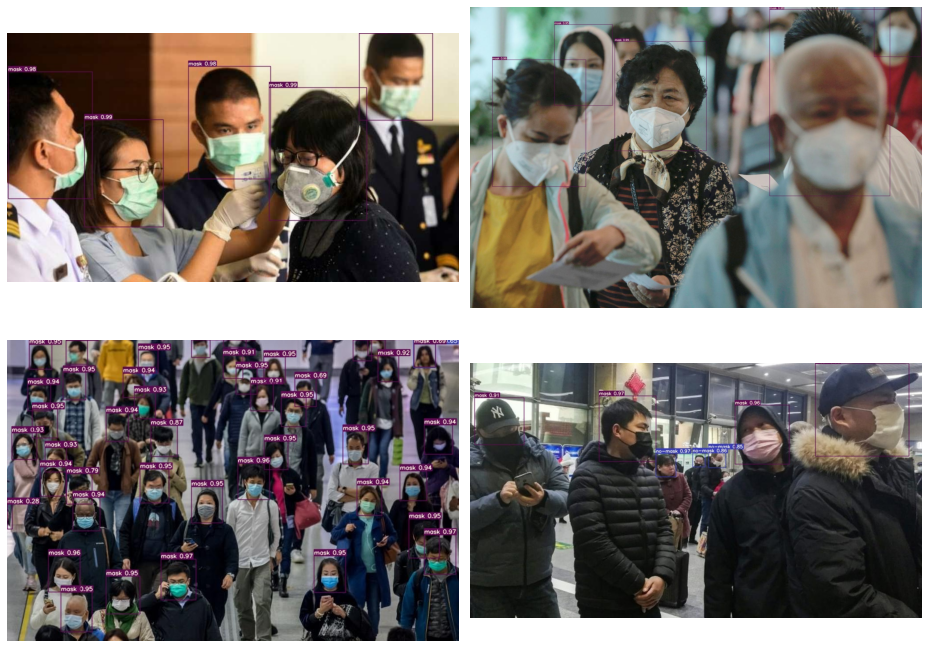

In [10]:
# visualize detection results
bbox_img1 = plt.imread("runs/detect/exp_mask/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg")
bbox_img2 = plt.imread("runs/detect/exp_mask/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg")
bbox_img3 = plt.imread("runs/detect/exp_mask/phplpE73q_jpg.rf.0ab5de066db2a3791b039388014565fe.jpg")
bbox_img4 = plt.imread("runs/detect/exp_mask/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.51ed69bf8d327d93b429a08581f6dea0.jpg")

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(bbox_img1)
plt.axis("off") 

plt.subplot(2, 2, 2)
plt.imshow(bbox_img2)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bbox_img3)
plt.axis("off") 

plt.subplot(2, 2, 4)
plt.imshow(bbox_img4)
plt.axis("off")

plt.tight_layout()
plt.show()